2. Two of the following characteristics:
2.1 Average path length <--

2.2 Clustering coefficient <--

2.3 Small-worldness


3. At least one of centrality measures:
3.1 Degree centrality <--

3.2 Closeness centrality￼

3.3 Betweenness <--

3.4 Prestige

3.5 Decay centrality


In [21]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import networkx as nx

import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [22]:
%precision 2

'%.2f'

In [23]:
options = {
    'node_color': 'lavender',
    'node_size': 500,
    'width': 1, 
    'with_labels':True
}

In [24]:
def walk_calc(input_data):
    n = input_data.shape[0]
    walk = input_data; w2 = input_data
    i = 1
    while np.sum(walk>0)<(n)**2:
        i+=1
        w2 = np.dot(w2, input_data)    
        walk = walk+i*((w2>0) & (walk==0))
    np.fill_diagonal(walk, 0)
    return(walk)

Adjacency Matrix:


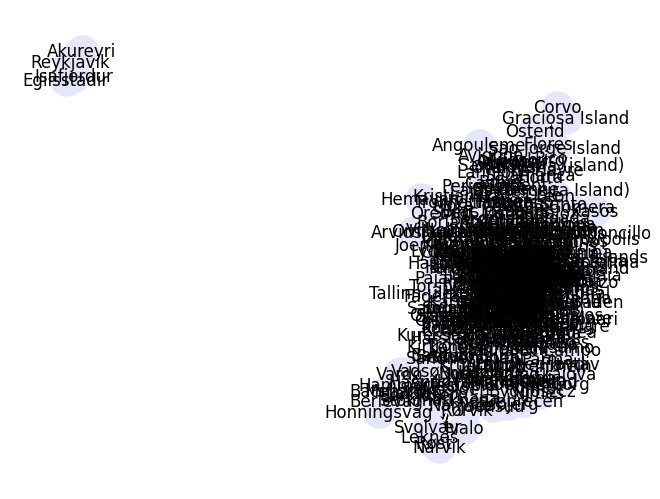

In [31]:
#Reading data
input_data = pd.read_csv('EUEEA.csv', index_col = 0)

#Creating network object
G = nx.DiGraph(input_data)
nx.draw(G, **options)


print('Adjacency Matrix:')
df = nx.to_pandas_adjacency(G, dtype=int)

In [26]:
input_data

,Aalborg,Aarhus,Agen,Ajaccio,Akureyri,Alesund,Alexandroupolis,Alghero,Alicante,Almeria,...,Warsaw,Weeze,Westerland,Wroclaw,Zadar,Zagreb,Zakynthos,Zaragoza,Zurich,Zweibruecken
Aalborg,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Aarhus,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Agen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ajaccio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Akureyri,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zagreb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,0
Zakynthos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zaragoza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zurich,0,0,0,0,0,0,0,0,1,0,...,2,0,1,1,0,2,0,0,0,0


In [ ]:
#Clustering_Coefficient

In [27]:
input_data = df.values
n = input_data.shape[0]

walks = walk_calc(input_data)

#calculating the walks of length of 2
walks2 = np.dot(input_data, input_data)
np.fill_diagonal(walks2, 0)

#calculating degree
d = np.sum(input_data, axis = 0)
dd = d*(d-1)

closed=dict.fromkeys(np.arange(n))
for a in range(n):
    closed[a] = []
    for b in range(n):
        for c in range(n):
            if (a != b) & (c != b) & (a != c):
                bond = input_data[a, b] + input_data[a, c] + input_data[b, c]
                if bond == 3:
                    closed[a].append([a, b, c])    
                
clustering_coeff = {}
clustering_local = {}
for node in closed.keys():
    n_triangle = len(closed[node])
    n_path = np.sum(walks2, axis = 1)
    clustering_coeff[node] = n_triangle/np.max([1, n_path[node]])
    clustering_local[node] = n_triangle/np.max([1,dd[node]])

KeyboardInterrupt: 

In [33]:
idx0 = df.index[np.sum(df, axis = 0)> 0]
idx1 = df.index[np.sum(df, axis = 1)> 0]
idx_filter = idx0.union(idx1)

df = df.loc[idx_filter, idx_filter]
G_directed = nx.DiGraph(df)
G_undirected = nx.Graph(df)

In [40]:
# Diameter_EUEEA
for C in nx.strongly_connected_components(G_directed):
    if len(C) > 1:
        G_connected = G_directed.subgraph(C) 
        print(len(G_connected), nx.algorithms.distance_measures.diameter(G_connected))

396 6
4 2


In [1]:
print('test')

test
